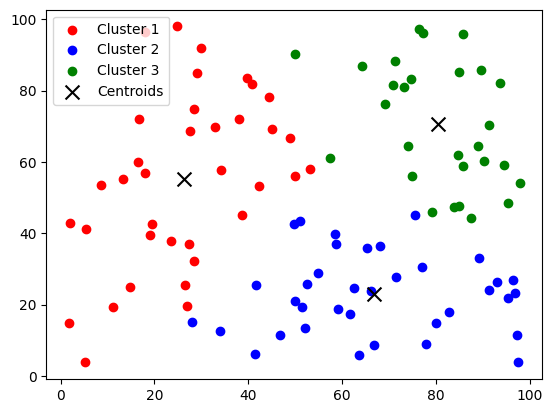

In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np

# Generate random data points
def generate_random_data(num_points, x_range, y_range):
    data = []
    for _ in range(num_points):
        x = random.uniform(*x_range)
        y = random.uniform(*y_range)
        data.append((x, y))
    return np.array(data)

# Initialize random centroids
def initialize_centroids(data, k):
    indices = random.sample(range(len(data)), k)
    return data[indices]

# Assign data points to the nearest centroid
def assign_clusters(data, centroids):
    clusters = {}
    for point in data:
        distances = [np.linalg.norm(point - centroid) for centroid in centroids]
        cluster_idx = np.argmin(distances)
        if cluster_idx not in clusters:
            clusters[cluster_idx] = []
        clusters[cluster_idx].append(point)
    return clusters

# Recompute centroids as the mean of assigned points
def recompute_centroids(clusters):
    return [np.mean(points, axis=0) for points in clusters.values()]

# Check for convergence
def has_converged(old_centroids, new_centroids):
    return np.allclose(old_centroids, new_centroids)

# K-Means implementation
def kmeans(data, k, max_iterations=100):
    centroids = initialize_centroids(data, k)
    for _ in range(max_iterations):
        clusters = assign_clusters(data, centroids)
        new_centroids = recompute_centroids(clusters)
        if has_converged(centroids, new_centroids):
            break
        centroids = new_centroids
    return clusters, centroids

# Plot the results
def plot_clusters(clusters, centroids):
    colors = ['red', 'blue', 'green', 'purple', 'orange']
    for idx, points in clusters.items():
        points = np.array(points)
        plt.scatter(points[:, 0], points[:, 1], label=f'Cluster {idx+1}', color=colors[idx % len(colors)])
    centroids = np.array(centroids)
    plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x', s=100, label='Centroids')
    plt.legend()
    plt.show()

# Main program
if __name__ == "__main__":
    # Parameters
    num_points = 100
    k = 3
    x_range = (0, 100)
    y_range = (0, 100)

    # Generate random data
    data = generate_random_data(num_points, x_range, y_range)

    # Run K-Means
    clusters, centroids = kmeans(data, k)

    # Plot results
    plot_clusters(clusters, centroids)
